<b>Reviewer's comment v.1</b> <a class="tocSkip"></a>
    
Hello, Harvey! 

I see, you changed the replacement of nans for users and critics scores)

Your pie-charts for part 4 and conclusions are great!

So, I'm glad to say that your project has passed code review!

Good luck on your next sprint)

&#127881;
&#127881;
&#127881;

</div>

Hello Harvey!

My name is Karina. Today I'm reviewing your project.

Firstly, I'll only mark mistakes, if you have them. I'll give you oppotunity to fix it yourself. Of course, I'll add details if where are any difficulties.

Good luck!

Please respond to my comments and mark changes using color codes. 
Below you will find my comments - please do not change them.
You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Introduction

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

## Initialization

Let's begin by loading all necessary libraries

In [1]:
# Load all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Load data

Lets create a data frame by loading up the dataset.

In [2]:
# Create data frame from csv files
df = pd.read_csv('/datasets/games.csv')

### Visualise data 

Let's get our initial visualisation of the data

In [3]:
# Print dataframe sample and info
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


From our initial visualisation, we can see that there are missing values in the dataset, inappropriate data types and some inconvenient naming styles which all needs to be sorted before analysis can begin

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pretty good observations)

## Preprocessing.

In this step, our main aim is to make sure that the data is ready for analysis. So here we will fill missing values, change data types and add aditional data columns that could help with processing this data if necessary.

### Address column names

To avoid mistakes, it's best to make column names coherent. This helps to reduce the amount of typos encountered. We commonly use lowercase. 

In [4]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Usage of str.lower() is great here)

### Check for duplicates

In this subsection, we will check the dataset for any duplicates and deal with them accordingly.

In [5]:
# Checking duplicates
df.duplicated().value_counts()

False    16715
dtype: int64

From our check, there doesn't seem to be any duplicates in our data set.

### Working with missing values

In this section, we will visualize missing values in detail and decide on what to do with them depending on the case.

#### Visualize data in detail

In [6]:
# Print sample of data
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
# Get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are 6 columns with missing values in this dataset. These columns are `name`, `year_of_release`, `genre`, `critic_score`, `user_score` and `rating`.

In [8]:
# Missing values in name column
display(df[df['name'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Missing values in year_of_release column
display(df[df['year_of_release'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
# Missing values in genre column
display(df[df['genre'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# Missing values in critic_score column
display(df[df['critic_score'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
# Missing values in user_score
display(df[df['user_score'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Missing values in rating column
display(df[df['rating'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
# Visualize tbd scores
print(df[df['user_score'] == 'tbd'])
tbd_percent = len(df[df['user_score'] == 'tbd'])/len(df) 
print(f'Percentage of values: {tbd_percent:.1%}')

                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct part)

### Filling in missing values

In [15]:
# Name and genre column
df = df.dropna(subset=['name','genre'])
print(df[df['name'].isna() == True])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Just two rows have missing data for both genre and name columns. These rows don't provide much in terms of value or information and so can be dropped.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good ideas)

In [16]:
# Rating column
rat_tab = df.pivot_table(index='genre', values= "rating", aggfunc=pd.Series.mode).reset_index()
display(rat_tab)
def fill_rat(value):
    if (pd.isna(value['rating']) == True) and ((value['genre'] == 'Action') or (value['genre'] == 'Fighting') or (value['genre'] == 'Role-Playing') or (value['genre'] == 'Strategy')):
        return 'T'
    if (pd.isna(value['rating']) == True) and (value['genre'] == 'Shooter'):
        return 'M'
    if (pd.isna(value['rating']) == True) and (value['genre'] == 'Sports') or (value['genre'] == 'Simulation') or (value['genre'] == 'Adventure') or (value['genre'] == 'Misc') or (value['genre'] == 'Platform') or (value['genre'] == 'Puzzle') or (value['genre'] == 'Racing'):
        return 'E'
    else:
        return value['rating']
    
# Apply function
df['rating'] = df.apply(fill_rat, axis=1)
print(df['rating'].isna().value_counts())

,genre,rating
0,Action,T
1,Adventure,E
2,Fighting,T
3,Misc,E
4,Platform,E
5,Puzzle,E
6,Racing,E
7,Role-Playing,T
8,Shooter,M
9,Simulation,E


False    16713
Name: rating, dtype: int64


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You've done a huge work filling nan values in rating col, but, as usual, it's impossible to replace such a big amount of missing values correctly.
    
So, the optimal way is to save nan values or to replace them by some word like 'unknown')

In [17]:
# Fill in year_of_release column
df['year_of_release'] = df['year_of_release'].fillna(0)

In [18]:
# Fill in user_score column
for value in df['user_score']:
    if value == 'tbd':
        df['user_score'] = df['user_score'].replace(value, '101')
df['user_score'] = df['user_score'].fillna('101')
print(df['user_score'].unique())

['8' '101' '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


We've now filled the rating column with the most popular ratings for the genres of the missing rows. As for the user_score column, we can use "101" as a place holder so we don't get errors when analysing data from this column.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Oh, we have a small problem here(
    
You've replaced 'tbd' by "101", and it's correct. However, now we've got nan and '101' values, which actually mean the same. Please, try to fill nan values and 'tbd' in the same way - by nan values or by '101' for both types.

As for the rest of the missing data, we can choose to leave them as they will not affect our analysis greatly as they are. There is no way to fill in `year_of_release` column accurately based on the information on the table, so we can use 0 as a place holder.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It's also possible to drop rows with missing years, cause it's only for about 2% of original data

### Change data type

In [19]:
# Change data type for year_of_release column
df['year_of_release'] = df['year_of_release'].astype('int')

In [20]:
# Change data type for user_score column
df['user_score'] = df['user_score'].astype('float')

### Enrich data

In [21]:
# Create total_sales column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,101.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,101.0,T,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,101.0,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,101.0,M,28.31


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct calculations)

One more possible way:
    
    df['sum_col'] = df[list_of_cols_to_sum].sum(axis=1)

## Analysis

### Number of games released each year

,year,number_of_games
29,2008,1427
30,2009,1426
31,2010,1255
28,2007,1197
32,2011,1136
27,2006,1006
26,2005,939
23,2002,829
24,2003,775
25,2004,762


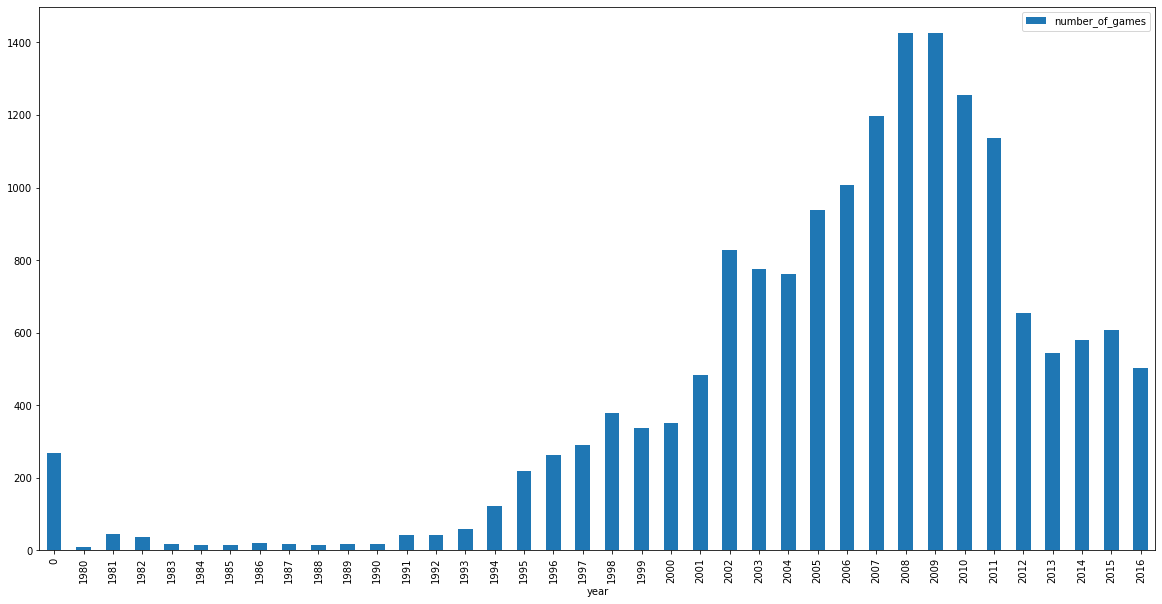

In [22]:
# Create a pivot table with yearly number of games
number_of_games = df.pivot_table(index='year_of_release', values='platform', aggfunc='count').reset_index().rename(columns={'year_of_release':'year', 'platform':'number_of_games'})
display(number_of_games.sort_values(by='number_of_games', ascending=False))
number_of_games.plot(kind='bar', y='number_of_games', x='year', figsize=(20,10))
plt.show()

From the above analysis, we can see the total number of games released each year. 2008 and 2009 were the years with the most game titles released.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice plot and interpretation)

### Total sales for each platform

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


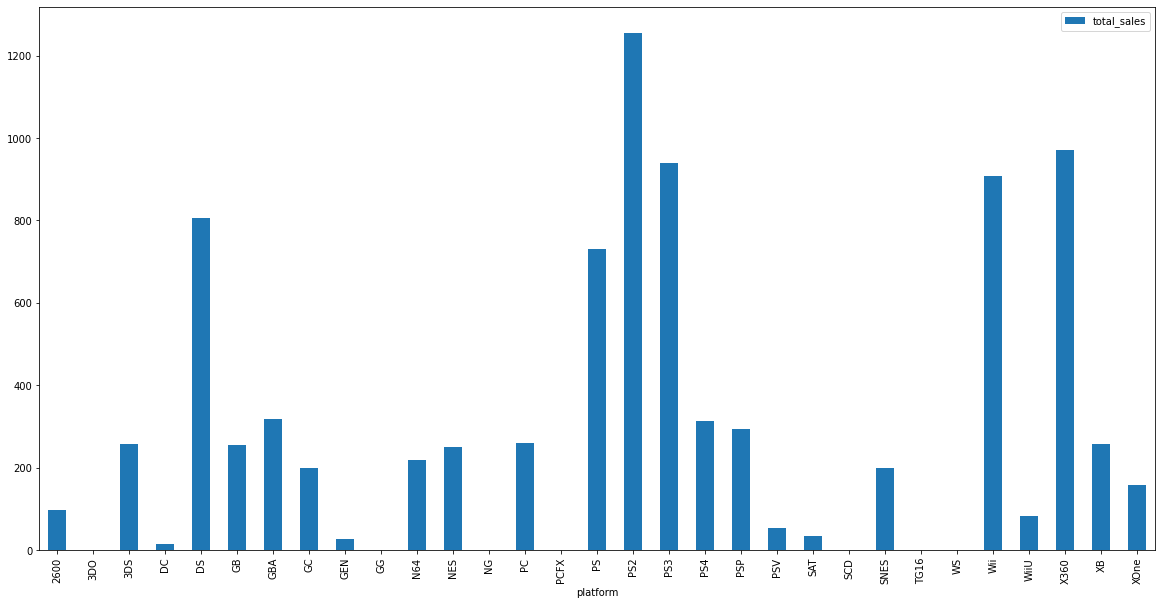

In [23]:
# Creat a pivot table with total sales for each platform
tot_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
display(tot_sales.sort_values(by='total_sales', ascending=False))
tot_sales.plot(kind='bar', y='total_sales', x='platform', figsize=(20,10))
plt.show()

From our analysis, we have identified PS2, X360, PS3, Wii and DS to be the highest 5 platforms in terms of sales.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great conclusion)

In [24]:
# Build a distribution for total sales of top platform games per year.
chosen = []
filt = tot_sales.sort_values(by='total_sales', ascending=False)
for plat in filt['platform'].head(10):
    chosen.append(plat)
top_plat_sales = df.query('platform in @chosen').pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum').reset_index()
display(top_plat_sales)

platform,year_of_release,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
0,0,3.34,4.97,3.76,3.28,22.21,8.31,NaN,4.52,16.33,10.18
1,1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
5,1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
6,1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
7,1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
8,1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
9,1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


From the above table, we can see the sales of games on different platforms. Ps, PS2, DS,GBA and PSP were once popular platforms but now have zero sales. Also, using the data from the PS consoles, we can see that it takes 6 years for a new console to be introduced and about 5 years for the old one to fade.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Interesting way) The results are correct)

In [25]:
# Calculate lifespan of console
PS_life = len(top_plat_sales['PS'][top_plat_sales['PS'].isna() == False])
PS2_life = len(top_plat_sales['PS2'][top_plat_sales['PS2'].isna() == False])
PS3_life = len(top_plat_sales['PS3'][top_plat_sales['PS3'].isna() == False])
PS4_life = len(top_plat_sales['PS4'][top_plat_sales['PS4'].isna() == False])

print(f'Lifespan of PS was {PS_life} years')

print(f'Lifespan of PS2 was {PS2_life} years')

print(f'Lifespan of PS3 is {PS3_life} years now')

print(f'Lifespan of PS4 is {PS4_life} years now')


Lifespan of PS was 11 years
Lifespan of PS2 was 13 years
Lifespan of PS3 is 12 years now
Lifespan of PS4 is 4 years now


The Ps4 launched in 2013. Seeing as all other popular consoles launched before then, it would be wise to start taking data from this year to be able to predict what campaigns might be successful in 2017.

### Filter dataframe to relevant time period

In [26]:
# Filter dataframe
df_filtered = df[df['year_of_release'] >= 2013]
df_filtered.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,101.0,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,101.0,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,101.0,T,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,101.0,E,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You've choosen the best time period! It's enought to fit models, and not to big to catch old trends) 

### Total sales for filtered dataframe

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


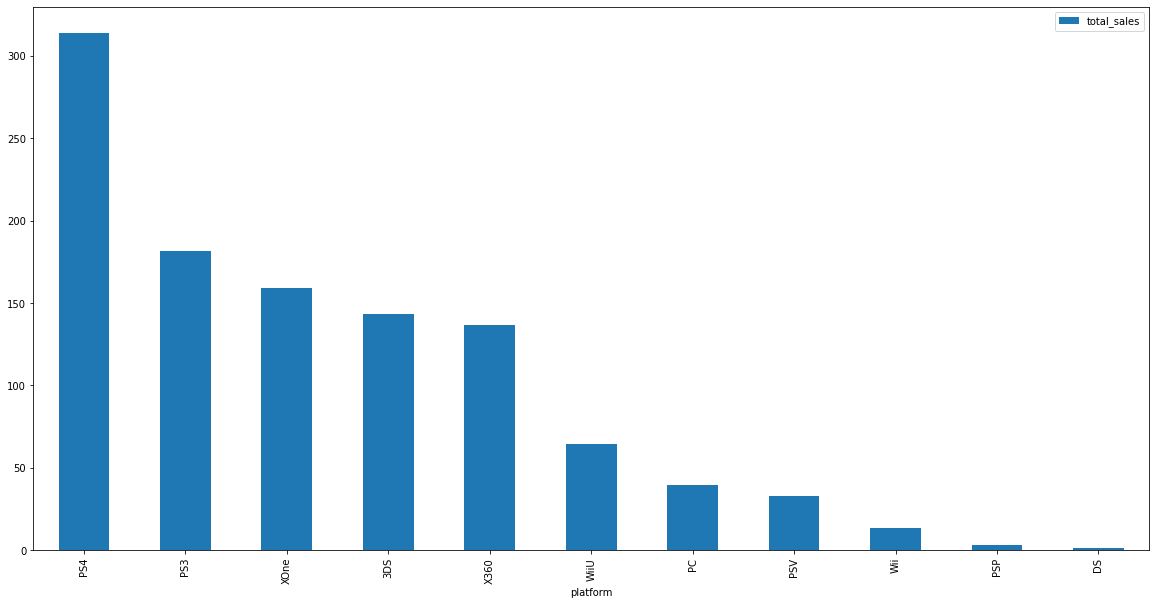

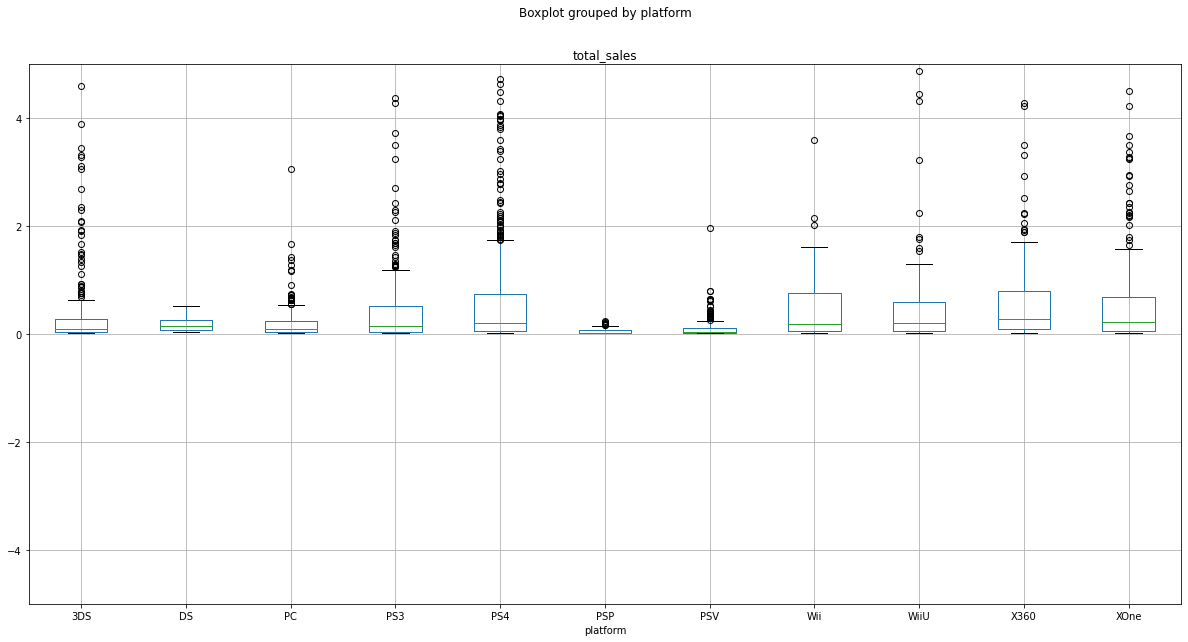

In [27]:
# Create pivot table with total sales for filtered dataframe
filt_tab = df_filtered.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
display(filt_tab)
filt_tab.plot(kind='bar', y='total_sales', x='platform', figsize=(20,10))
df_filtered.boxplot(by='platform', column=['total_sales'], figsize= (20,10))
plt.ylim(-5, 5)
plt.show()

In [28]:
# Create pivot table with total yearly sales for each platform
filt_year_tab = df_filtered.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(filt_year_tab)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


From our tables we can see that PS4, PS3 and XOne are the leading platforms in terms of modern day sales. However, when we look at the yearky sales for each platform, it seems that videogame sales dropped this year with an observed decrease accross all platforms. PS4, XOne and 3DS still show strong numbers while the rest are dwindling. They could possibly be at the end of their lifespan as is the case for the PS3.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Like your usage of pivot_tables) 

### Reviews and sales

In [29]:
# Check distribution of professional reviews and sales for PS4
prof_rev_sales = df_filtered[df_filtered['platform'] == 'PS4'].pivot_table(index=['critic_score'], values='total_sales', aggfunc='sum').reset_index()
display(prof_rev_sales)

,critic_score,total_sales
0,19.0,0.12
1,25.0,0.06
2,31.0,0.02
3,32.0,0.20
4,38.0,0.16
5,42.0,0.07
6,43.0,0.29
7,44.0,0.09
8,45.0,0.14
9,47.0,0.41


In [30]:
# Check distribution of user reviews and sales for PS4
user_rev_sales = df_filtered[df_filtered['platform'] == 'PS4'].pivot_table(index=['user_score'], values='total_sales', aggfunc='sum').reset_index()
user_rev_sales = user_rev_sales[user_rev_sales['user_score'] < 101]
display(user_rev_sales)

,user_score,total_sales
0,1.5,0.20
1,1.9,0.06
2,2.0,0.23
3,2.3,0.01
4,2.7,0.24
5,2.9,0.16
6,3.0,0.06
7,3.3,0.30
8,3.4,5.49
9,3.5,0.05


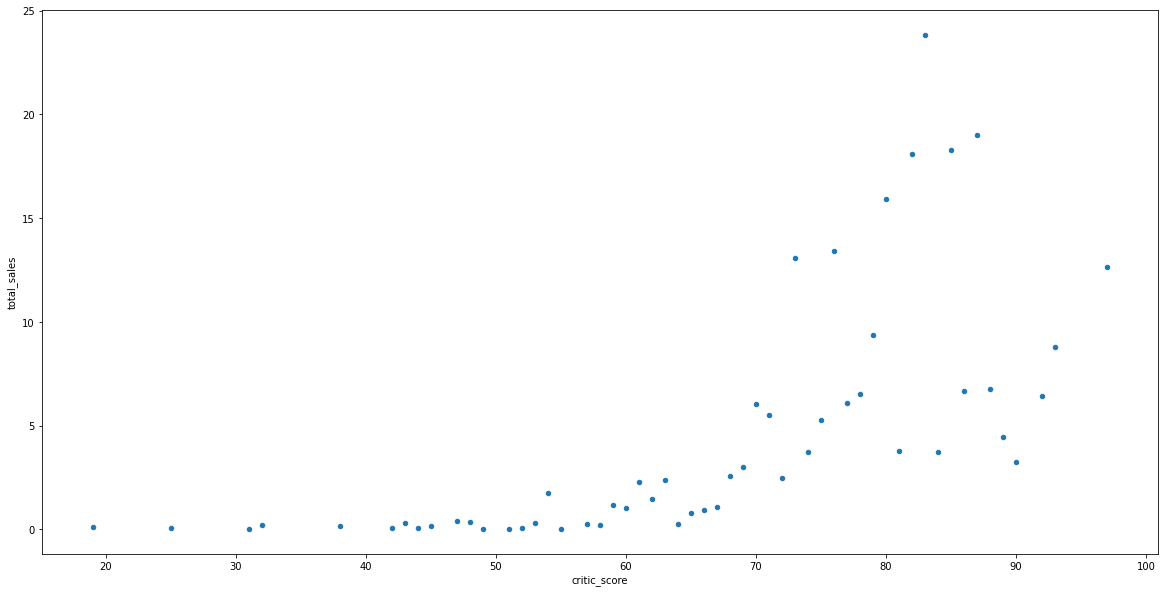

Pearson Correlation Coefficient: 0.6588377171476643


In [31]:
# Build a scatterplot for professional reviews and sales and calculate correlation
prof_rev_sales.plot(kind='scatter', y='total_sales', x='critic_score', figsize= (20,10))
plt.show()

print('Pearson Correlation Coefficient:', prof_rev_sales['total_sales'].corr(prof_rev_sales['critic_score']))

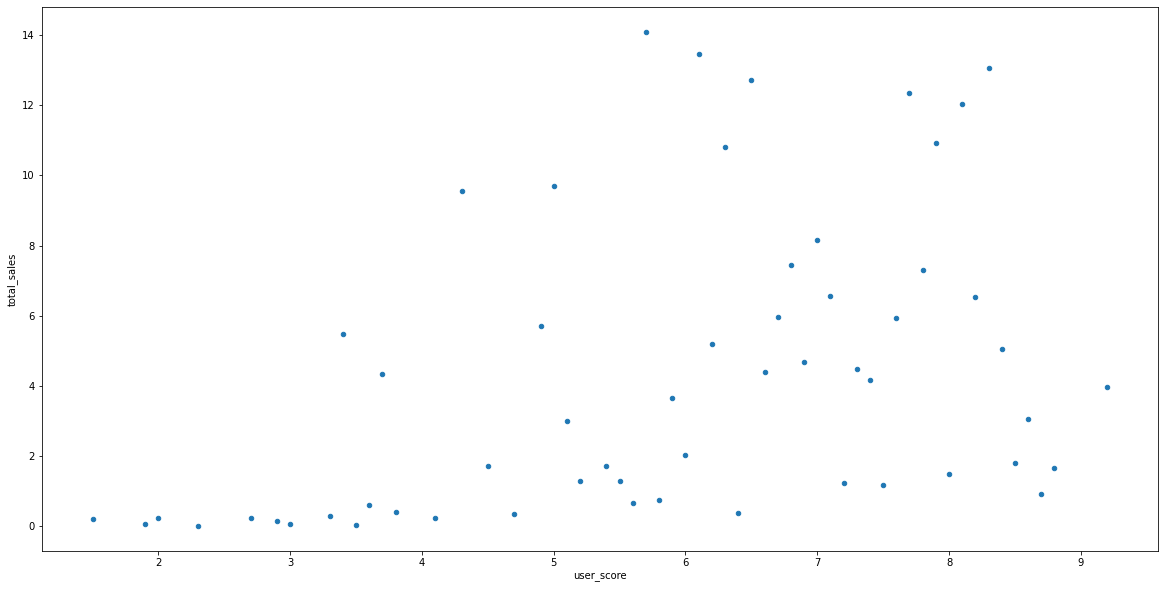

Pearson Correlation Coefficient: 0.4185021550618359


In [32]:
# Build a scatterplot for user reviews and sales and calculate correlation
user_rev_sales.plot(kind='scatter', y='total_sales', x='user_score', figsize= (20,10))
plt.show()
print('Pearson Correlation Coefficient:', user_rev_sales['total_sales'].corr(user_rev_sales['user_score']))

From our analysis, we can confidently say that professional reviews does affect total sales of games on the PS4 platform. However, user reviews doesn't seem to have a direct effect on total sales as there is a positive but weak correlation between them.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct correlations and interpretations)

### Distribution of games by genre

In [33]:
# Create pivot table showing distribution of games by genre
gen_tab = df_filtered.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
display(gen_tab)

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


From our table, the most profitable genres seem to be `Action`, `Shooter` and `Sports` accross all platforms. The lowest sales fall within the `Puzzle` , `Strategy` and `Simulation` genres.

## User Profile for each region

### Visualise table

In [34]:
# Print overview of dataframe
df_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,101.0,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,101.0,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,101.0,E,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,101.0,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,101.0,T,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,101.0,E,0.01


### Create user profiles

In [35]:
# NA users
na_users = df_filtered[df_filtered['na_sales'] > 0]

In [36]:
# EU users
eu_users = df_filtered[df_filtered['eu_sales'] > 0]

In [37]:
# JP users
jp_users = df_filtered[df_filtered['jp_sales'] > 0]

### Top 5 platforms for each profile

,platform,na_sales
4,PS4,108.74
9,XOne,93.12
8,X360,81.66
3,PS3,63.50
0,3DS,38.20


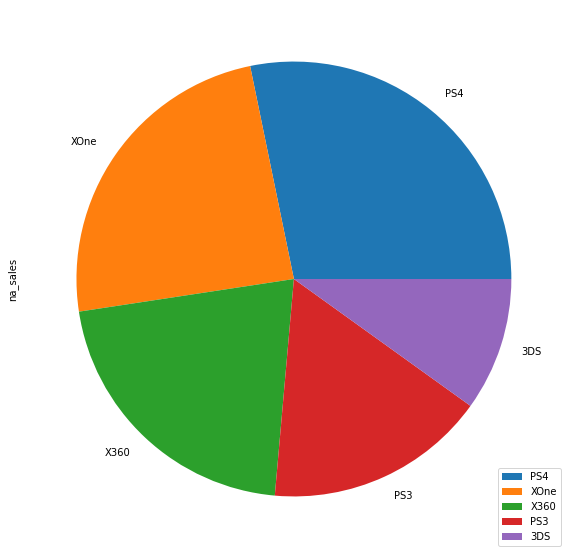

In [38]:
# Create table showing platforms for NA users
na_plat_tab = na_users.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
display(na_plat_tab.head())
label = ['PS4', 'XOne', 'X360', 'PS3', '3DS']
na_plat_tab.head().plot(kind='pie', y='na_sales', labels=label, figsize=(20,10))
plt.show()

,platform,eu_sales
4,PS4,138.66
3,PS3,67.04
9,XOne,51.28
8,X360,42.25
0,3DS,29.29


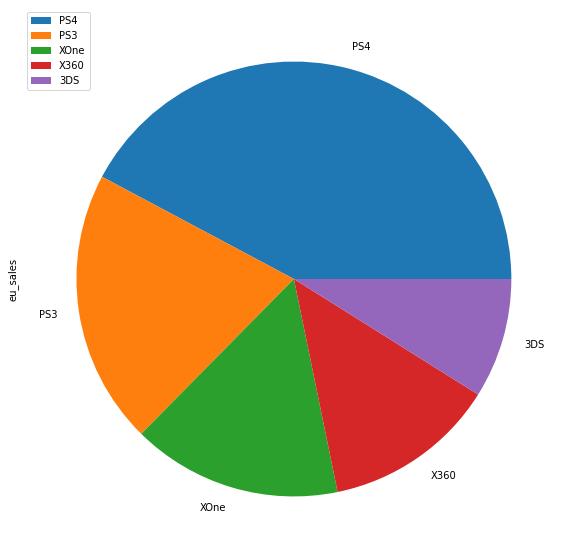

In [39]:
# Create table showing platforms for EU users
eu_plat_tab = na_users.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
display(eu_plat_tab.head())
label2 = ['PS4', 'PS3', 'XOne', 'X360', '3DS']
eu_plat_tab.head().plot(kind='pie', y='eu_sales', labels=label2, figsize=(20,10))
plt.show()

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
4,PSV,18.59
2,PS4,15.96
6,WiiU,10.88


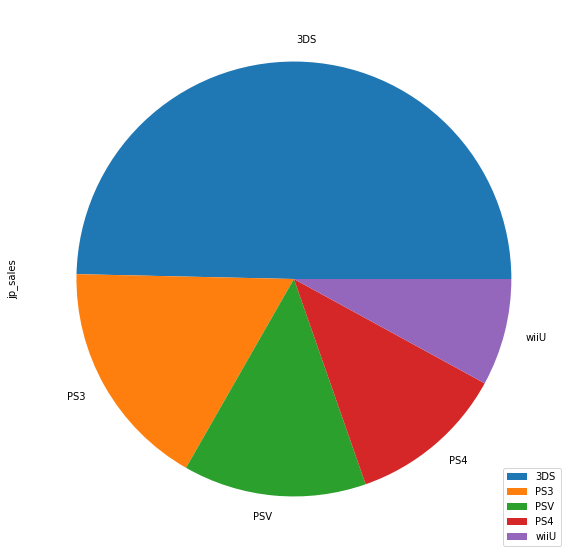

In [40]:
# Create table showing platforms for JP users
jp_plat_tab = jp_users.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
display(jp_plat_tab.head())
label3 = ['3DS','PS3', 'PSV', 'PS4', 'wiiU',]
jp_plat_tab.head().plot(kind='pie', y='jp_sales', labels=label3, figsize=(20,10))
plt.show()

For NA users, `PS4`, `XOne` and `X360` platforms dominate the market. But for EU users `PS3` is very popular and has the second highest number of game title sales. While in the JP market, `3DS` surprisingly has the most sales, followed by `PS3` and `PSV`. `PS4` comes in 4th place and it seems `XOne` is not at all popular among JP users. All this can be seen in the pie charts for the top 5 platforms which shows the share of the top five platforms.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Also correct interpretation)

### Top 5 genres for each profile

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


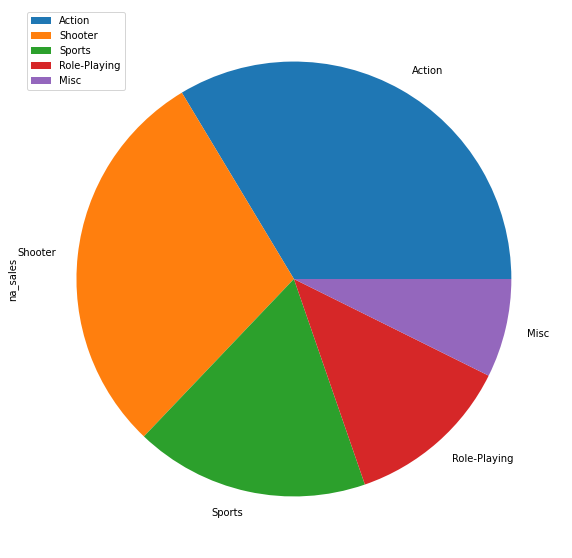

In [41]:
# Create table showing genres for NA users
na_gen_tab = na_users.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
display(na_gen_tab.head())
label4 = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
na_gen_tab.head().plot(kind='pie', y='na_sales', labels=label4, figsize=(20,10))
plt.show()

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


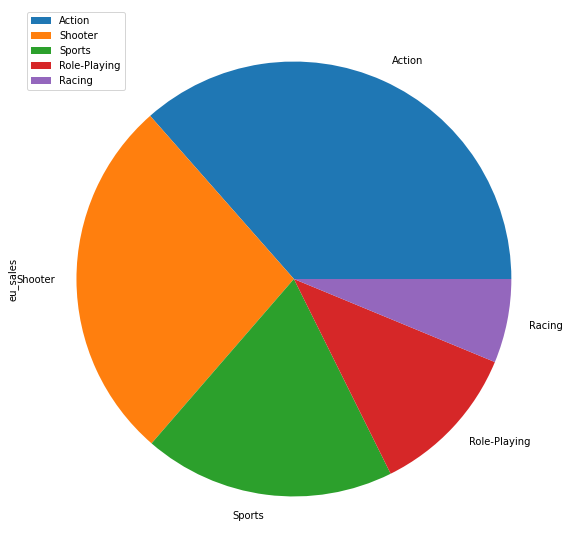

In [42]:
# Create table showing genres for EU users
eu_gen_tab = eu_users.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
display(eu_gen_tab.head())
label5 = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
eu_gen_tab.head().plot(kind='pie', y='eu_sales', labels=label5, figsize=(20,10))
plt.show()

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


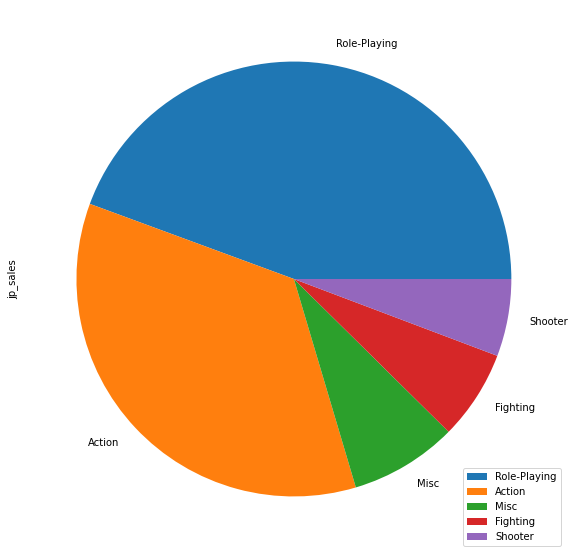

In [43]:
# Create table showing genres for JP users
jp_gen_tab = jp_users.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
display(jp_gen_tab.head())
label6 = ['Role-Playing', 'Action','Misc','Fighting','Shooter']
jp_gen_tab.head().plot(kind='pie', y='jp_sales', labels=label6, figsize=(20,10))
plt.show()

For both NA and EU users, `Action`, `Shooter` and `Sports` are the most popular genres. However among JP users, `Role-Playing`, `Action` and `Misc` seem to be the most popular genres.

### Ratings and sales in each region

,rating,na_sales
2,M,181.09
0,E,130.02
3,T,92.04
1,E10+,34.56


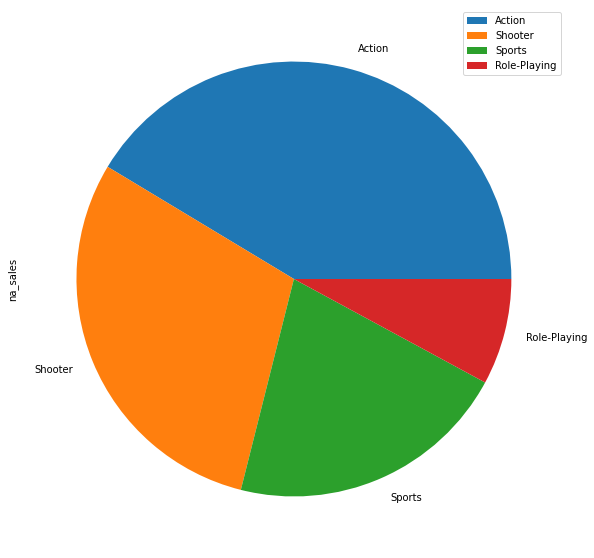

In [44]:
# Create table showing ratings for NA users
na_rat_tab = na_users.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
display(na_rat_tab)
label7 = ['M', 'E', 'T', 'E10+']
na_rat_tab.head().plot(kind='pie', y='na_sales', labels=label4, figsize=(20,10))
plt.show()

,rating,eu_sales
2,M,158.50
0,E,135.42
3,T,73.08
1,E10+,25.23


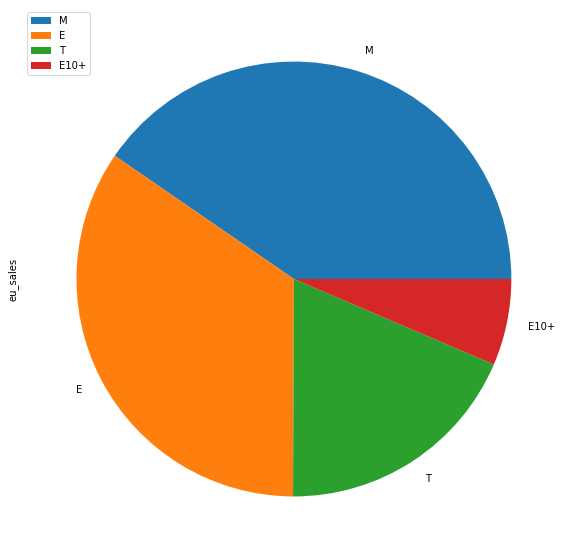

In [45]:
# Create table showing ratings for EU users
eu_rat_tab = eu_users.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
display(eu_rat_tab)
label8 = ['M', 'E', 'T', 'E10+']
eu_rat_tab.head().plot(kind='pie', y='eu_sales', labels=label8, figsize=(20,10))
plt.show()

,rating,jp_sales
3,T,85.48
0,E,36.72
2,M,14.32
1,E10+,4.26


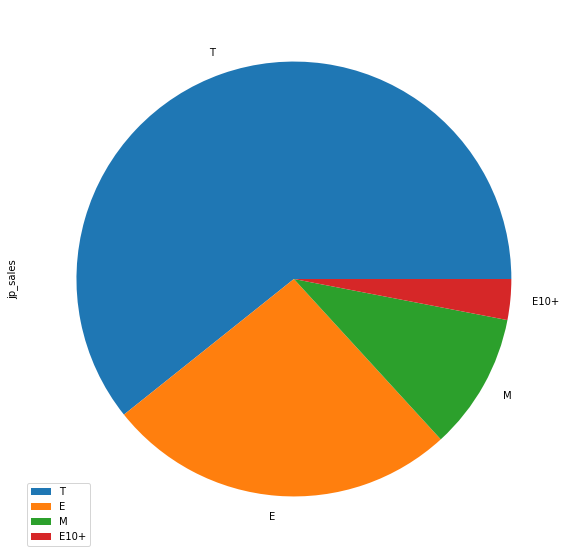

In [46]:
# Create table showing ratings for JP users
jp_rat_tab = jp_users.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
display(jp_rat_tab)
label9 = ['T', 'E', 'M', 'E10+']
jp_rat_tab.head().plot(kind='pie', y='jp_sales', labels=label9, figsize=(20,10))
plt.show()

For both NA and EU users, games with the rating `M` are the most popular while among JP users, games with the rating `T` are the most popular. So from this we can say that ESRB ratings do affect sales. NA and EU users prefer mature rated games while JP users prefer Teen rated games. This could also be a reflection of the gaming age group in these regions.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please, try to add plots here - for e.g, pie-charts will be suitable here)

## Testing Hypothesis

### Average user ratings of the Xbox One and PC platforms are the same.

H0 - Average user ratings of the Xbox One and PC platforms are the same.

H1 - Average user ratings of the Xbox One and PC platforms are not the same.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I'm impressed with your formulation of both hypothesises here) Great work!

</div>

In [47]:
# Create values for testing
xone = df_filtered[df_filtered['platform'] == 'XOne']
xone_user_ratings = xone['user_score'][xone['user_score'] < 101]

pc = df_filtered[df_filtered['platform'] == 'PC']
pc_user_ratings = pc['user_score'][pc['user_score'] < 101]

In [48]:
# Testing hypothesis
alpha = 0.05 # Critical statistical significance level

results= st.ttest_ind(xone_user_ratings, pc_user_ratings)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
if results.pvalue > alpha:
    print('We cannot reject the null hypothesis')

p-value: 0.14012658403611647
We cannot reject the null hypothesis


From our hypothesis, we can say that the average user ratings of both platforms are the same

### Average user ratings for the Action and Sports genres are different.

H0 - Average user ratings for the Action and Sports genres are the same.

H1 - Average user ratings for the Action and Sports genres are different.

In [49]:
# Create values for testing
action = df_filtered[df_filtered['genre'] == 'Action']
action_user_score = action['user_score'][action['user_score'] < 101]

sports = df_filtered[df_filtered['genre'] == 'Sports']
sports_user_score = sports['user_score'][sports['user_score'] < 101]

In [50]:
# Testing hypothesis

alpha = 0.05 # Critical statistical significance level

results= st.ttest_ind(action_user_score, sports_user_score)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
if results.pvalue > alpha:
    print('We cannot reject the null hypothesis')

p-value: 1.0517832389140023e-27
We reject the null hypothesis


From our testing, we can say that the average user ratings for the Action and Sports genres are different.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You've used the tests correctly, but your results may change after corrections.
</div>

## Conclusion

The aim of this project was to spot potential big winners among different gaming platforms and plan advertising campaigns.

From our analysis the platforms that appear to be big winners are `PS4`, `XOne` and `3DS`. Advertising campaigns should be built around these platforms for desired results. 
But also looking at the markets, it would be beneficial to focus ads on the `3DS` platform for JP users.

We also determined that professional ratings does affect sales of games and so this worth keeping an eye on. The correlation between sales and user ratings is weak and so should not be a big problem especially when professional ratings are high.



So how did we get to these conclusions:


Firstly we loaded the dataset and filled in missing values where appropriate.
After that, we converted the data types to suit our analysis.
Then we analysed data, comparing total sales per year on all platforms and studying the lifespan of platforms to know what platform will still remain relevant in 2017.
With all that done, we went on to compare the sales among the different platforms in this timeline and picked out the 5 top performers.

We also checked sales distribution accross regions to see what regions boosted certain platforms. There were various graphs and tables made with a lot of valuable data.

We checked correlations between professional ratings and sales and also between user ratings and sales.

We tested the hypothesis that average user ratings of the Xbox One and PC platforms are the same which was true. And also tested the hypothesis average user ratings for the Action and Sports genres are different which proved to be true.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I can assume, you didn't finish this conclusion) The beggining is good, I'm sure the rest part is good as well)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your project looks pretty good! 

I especially liked your code style and usage of pivot tables)

I also like your correlations and tests part and interpretations - everything is clear and correct)
Keep up the good work!
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Unfortunately, I cannot accept this project.
    
Please, check the replacement of nans for users and critics scores)

I could also recommend you to add plots for part 4 to make your project perfect&#128512;

And please, check your conclusions - looks like something missed)    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good luck! 

One more time and you'll have it!

&#127808;

</div>